Read in the output catalogs and make some summary plots showing the SNANA host galaxy sample

In [2]:
%matplotlib inline

In [9]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
import snhostspec
from glob import glob

In [ ]:
# Host galaxy magnitude vs redshift compared to 3DHST
photdat3d = fits.open('3DHST/3dhst_master.phot.v4.1/3dhst_master.phot.v4.1.cat.FITS')
f160 = photdat3d[1].data['f_F160W']
zspec = photdat3d[1].data['z_spec']
zphot = photdat3d[1].data['z_peak']
zbest = np.where(zspec>0, zspec, zphot)
usephot = photdat3d[1].data['use_phot']

ivalid = np.where(((f160>0) & (zbest>0)) & (usephot==1) )[0]
mH3D = -2.5*np.log10(f160[ivalid])+25
z3D = zbest[ivalid]
plt.plot(z3D, mH3D, 'b.', ls=' ', ms=1, alpha=0.1)
#plt.plot(hostz_med, hostmag_med, 'g.', ls=' ', ms=3, alpha=0.3)
plt.plot(hostz_deep, hostmag_deep, 'r.', ls=' ', ms=3, alpha=0.3)
ax = plt.gca()
xlim = ax.set_xlim(0,2.5)
ylim = ax.set_ylim(28,20)
ax.set_xlabel('redshift')
ax.set_ylabel('host galaxy AB magnitude')

No Redshift detected. Max S/N=0.6 at rest wave=362 nm


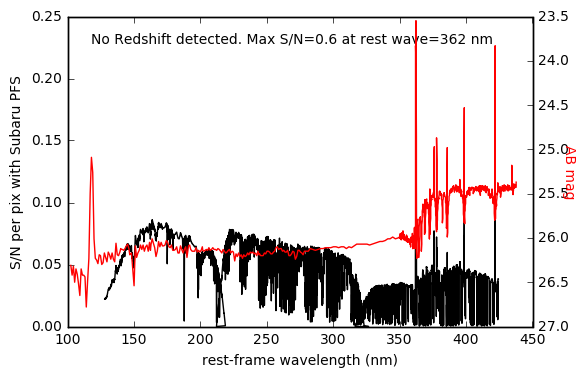

In [11]:
# Examples of some spectrum plots
reload(snhostspec)
etcoutfilelist = glob('etcout/subaruPFS*dat')
etcoutfile_random = np.random.choice(etcoutfilelist)
subarusim = snhostspec.SubaruObsSim(etcoutfile_random)
subarusim.check_redshift(snrthresh=5, showplot=False)
subarusim.load_specdata()
subarusim.plot(showspec=True)

In [8]:
subarusim.redshift_detected

0